In [10]:
import talib as ta
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# S&P 500: 
ticker = yf.Ticker('^GSPC')

# Russell 2000: 
#ticker = yf.Ticker('^RUT')

# Nikkei 225: 
#ticker = yf.Ticker('^N225')


# FTSE 100: 
#ticker = yf.Ticker('^FTSE')

# SSE Composite Index: 
#ticker = yf.Ticker('000001.SS') 

df = ticker.history(period = '1d', start='1999-08-01', end='2022-06-30')

# Dow Jones Industrial Average
# ticker = yf.Ticker('^DJI')

In [12]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-08-02,1328.719971,1344.689941,1325.209961,1328.050049,649550000,0,0
1999-08-03,1328.050049,1336.130005,1314.910034,1322.180054,739600000,0,0
1999-08-04,1322.180054,1330.160034,1304.500000,1305.329956,789300000,0,0
1999-08-05,1305.329956,1313.709961,1287.229980,1313.709961,859300000,0,0
1999-08-06,1313.709961,1316.739990,1293.189941,1300.290039,698900000,0,0
...,...,...,...,...,...,...,...
2022-06-23,3774.709961,3802.580078,3743.520020,3795.729980,4078100000,0,0
2022-06-24,3821.750000,3913.649902,3821.750000,3911.739990,6742870000,0,0
2022-06-27,3920.760010,3927.719971,3889.659912,3900.110107,3385120000,0,0


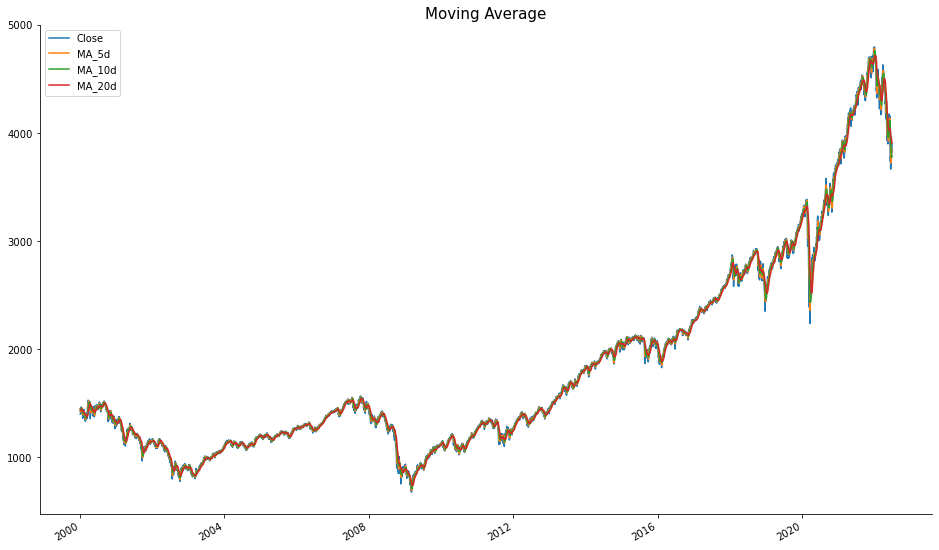

In [13]:
# SMA
periods=[5,10,20]

for i in periods:
    df['MA_'+str(i)+'d']=ta.SMA(df.Close,timeperiod=i)

df.loc['2000-01-04':,['Close','MA_5d','MA_10d','MA_20d']].plot(figsize=(16,10))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('Moving Average',fontsize=15)
plt.xlabel('')
plt.show()

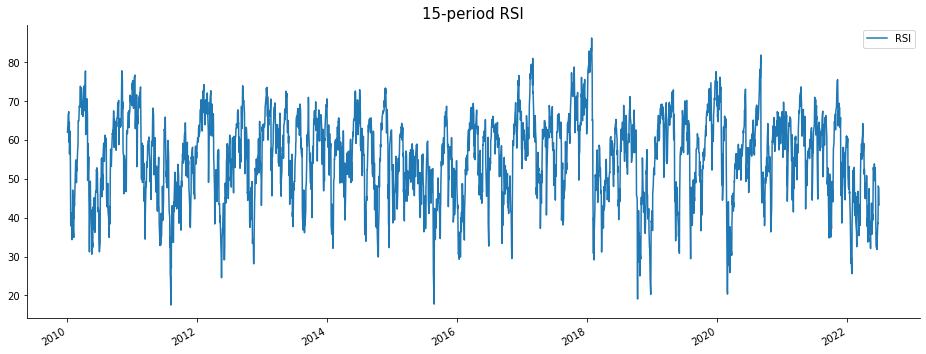

In [14]:
# RSI
df['RSI']=ta.RSI(df.Close,timeperiod=15)

df.loc['2010-01-04':,['RSI']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('15-period RSI',fontsize=15)
plt.xlabel('')
plt.show()

In [15]:
# Var
df['Var'] = ta.VAR(df.Close, timeperiod=5, nbdev=1)

In [16]:
# calculate log return 
df['Return_1d'] = np.log(df['Close']/df['Close'].shift(1)).dropna()
df['Return_5d'] = np.log(df['Close']/df['Close'].shift(5)).dropna()
df['Return_10d'] = np.log(df['Close']/df['Close'].shift(10)).dropna()
df['Return_20d'] = np.log(df['Close']/df['Close'].shift(20)).dropna()

In [17]:
# ADX
df['ADX'] = ta.ADX(df.High, df.Low, df.Close, timeperiod=14)

In [18]:
# MACD
macd, df['MACD_sig'], macdhist = ta.MACD(df.Close,fastperiod=12, slowperiod=26, signalperiod=9)

In [19]:
# ADOSC - Chaikin A/D Oscillator
df['ADOsc'] = ta.ADOSC(df.High, df.Low, df.Close, df.Volume, fastperiod=3, slowperiod=10)

In [20]:
# Hammer
df['Hammer'] = ta.CDLHAMMER(df.Open, df.High, df.Low, df.Close)

In [21]:
# Morning Star
df['MorningStar'] = ta.CDLMORNINGSTAR(df.Open, df.High, df.Low, df.Close)

In [22]:
# Hammer
df['InvHammer'] = ta.CDLINVERTEDHAMMER(df.Open, df.High, df.Low, df.Close)

In [23]:
# Evening Star
df['EveningStar'] = ta.CDLEVENINGSTAR(df.Open, df.High, df.Low, df.Close)

In [24]:
# Three Black Crows
df['3BlkCrows'] = ta.CDL3BLACKCROWS(df.Open, df.High, df.Low, df.Close)

In [25]:
corrDF = df.corr()
corrDF['Return_1d'].sort_values(ascending=False)

Return_1d       1.000000
Return_5d       0.432632
Return_10d      0.312353
RSI             0.294608
Return_20d      0.219207
ADOsc           0.162360
MorningStar     0.116825
EveningStar     0.074307
Close           0.019738
Low             0.011841
High            0.009433
ADX             0.005979
MA_5d           0.003143
MA_10d          0.001663
Open            0.001296
MA_20d          0.001126
MACD_sig       -0.001254
InvHammer      -0.022384
Hammer         -0.024211
Volume         -0.025283
Var            -0.097802
Dividends            NaN
Stock Splits         NaN
3BlkCrows            NaN
Name: Return_1d, dtype: float64

In [26]:
# training set
X = pd.concat([df['RSI'],
               #df['Close'],
               #df['Low'],
               df['ADX'],
               #df['Volume'],
               df['Var'],
               #df['MACD_sig'],
               df['ADOsc'],
               #df['Hammer'], 
               df['MorningStar'], 
               #df['InvHammer'], 
               #df['EveningStar'], 
               # df['3BlkCrows'],
               #df['MA_10d'],df['MA_20d'],
               df['Return_1d'],df['Return_5d'],
               df['Return_10d']],
               #df['Return_20d']],
               axis=1)

In [27]:
df['Return_1d'].describe()

count    5765.000000
mean        0.000183
std         0.012452
min        -0.127652
25%        -0.004837
50%         0.000594
75%         0.005878
max         0.109572
Name: Return_1d, dtype: float64

In [28]:
# df['Class'] = df['Return_1d'].map(lambda x: 1 if x >= 0.005 else (0 if x>-0.005 and x<0.005 else -1))
df['Class'] = df['Return_1d'].map(lambda x: 1 if x > 0 else -1)
y = df['Class']

In [29]:
X

,RSI,ADX,Var,ADOsc,MorningStar,Return_1d,Return_5d,Return_10d
Date,,,,,,,,
1999-08-02,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1999-08-03,NaN,NaN,NaN,NaN,0,-0.004430,NaN,NaN
1999-08-04,NaN,NaN,NaN,NaN,0,-0.012826,NaN,NaN
1999-08-05,NaN,NaN,NaN,NaN,0,0.006399,NaN,NaN
1999-08-06,NaN,NaN,105.499051,NaN,0,-0.010268,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-06-23,40.891577,26.686114,2687.186598,2.446902e+07,0,0.009487,0.001513,-0.080949
2022-06-24,48.137522,25.299872,5857.490353,2.651094e+09,0,0.030106,0.064671,-0.026757
2022-06-27,47.511930,23.857275,4375.222424,2.999002e+09,0,-0.002977,0.059495,-0.000192


In [30]:
X = X.reset_index() 

In [31]:
y = y.reset_index()

In [32]:
# rolling window data split

X_train = []
X_test = []
y_train = []
y_test = []

start_yr = 2005
end_yr = 2012

for i,year in enumerate(range(start_yr,end_yr)):
    X_train.append(pd.DataFrame(X.loc[(X['Date'] >= (str(year)+ '-01-01')) & (X['Date'] <= str(year+9)+ '-12-31')].drop('Date',axis=1)))
    X_test.append(pd.DataFrame(X.loc[(X['Date'] >= (str(year+10)+ '-01-01')) & (X['Date'] <= str(year+10)+ '-12-31')].drop('Date',axis=1)))
    y_train.append(y.iloc[X_train[i].index[0]+1:X_train[i].index[-1]+2].Class)
    y_test.append(y.iloc[X_test[i].index[0]+1:X_test[i].index[-1]+2].Class)

In [33]:
# expanding window data split

X_train = []
X_test = []
y_train = []
y_test = []

start_yr = 2005
end_yr = 2021

for i,year in enumerate(range(start_yr+9,end_yr)):
    
    X_train.append(pd.DataFrame(X.loc[(X['Date'] >= (str(start_yr)+'-01-01')) & (X['Date'] <= str(year)+'-12-31')].drop('Date',axis=1)))
    X_test.append(pd.DataFrame(X.loc[(X['Date'] >= (str(year+1)+'-01-01')) & (X['Date'] <= str(year+1)+'-12-31')].drop('Date',axis=1)))
    y_train.append(y.iloc[X_train[i].index[0]+1:X_train[i].index[-1]+2].Class)
    y_test.append(y.iloc[X_test[i].index[0]+1:X_test[i].index[-1]+2].Class)

In [34]:
for i in range(len(X_train)):
    if X_train[i].shape[0] != y_train[i].shape[0]:
        print(i)
    if X_test[i].shape[0] != y_test[i].shape[0]:
        print(i)

In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


def SVCkernel():
    return Pipeline(
        [
            ("std_scaler",StandardScaler()),
            ("kernelsvc",SVC(kernel="rbf",gamma=0.1,C=1,degree=3))        
        ]
    )
    
svm = SVCkernel()

In [36]:
'''
param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': [0.001, 0.01, 0.1, 1, 2, 3], 
}

svm = GridSearchCV(
    SVC(class_weight="balanced",kernel='rbf'), param_grid
)
svm = svm.fit(X_train[0], y_train[0])
print(svm.best_params_)

'''

'\nparam_grid = {\n    \'C\': [0.1, 1, 10], \n    \'gamma\': [0.001, 0.01, 0.1, 1, 2, 3], \n}\n\nsvm = GridSearchCV(\n    SVC(class_weight="balanced",kernel=\'rbf\'), param_grid\n)\nsvm = svm.fit(X_train[0], y_train[0])\nprint(svm.best_params_)\n\n'

In [37]:
# predictions by year
y_pred = []
for i in range(len(X_train)):
    svm.fit(X_train[i], y_train[i])
    pred = svm.predict(X_test[i])
    y_pred.append(pred) 

In [38]:
# all predictions for a single stock
single_len_pred = []
for arr in y_pred:
    for ele in arr:
        single_len_pred.append(ele)

single_len_test = []
for arr in y_test:
    for ele in arr:
        single_len_test.append(ele)        

In [39]:
# S&P 500
sp_pred = single_len_pred
sp_test = single_len_test

In [40]:
# Russell 2000
# russell_pred = single_len_pred
# russell_test = single_len_test

In [41]:
# Nikkei 225
# nikkei_pred = single_len_pred
# nikkei_test = single_len_test

In [42]:
# SSE Composite Index
#sse_pred = single_len_pred
#sse_test = single_len_test

### Evaluation Metrics for Binary Classification

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [44]:
acc_sum,pre_sum,rec_sum, f1_sum = 0,0,0,0
for i in range(len(y_pred)):
    acc_sum += accuracy_score(y_test[i], y_pred[i])
    pre_sum += precision_score(y_test[i], y_pred[i])
    rec_sum += recall_score(y_test[i], y_pred[i])
    f1_sum += f1_score(y_test[i], y_pred[i])
    
n = len(y_pred)
avg_acc = acc_sum / n
avg_pre = pre_sum / n
avg_rec = rec_sum / n
avg_f1 = f1_sum / n

In [45]:
metrics_tbl = pd.DataFrame.from_records([[avg_acc,avg_pre,avg_rec,avg_f1]], 
                          columns=['Accuracy', 'Precision','Recall','F1'], 
                          index=['SVM'])
metrics_tbl

,Accuracy,Precision,Recall,F1
SVM,0.546777,0.549748,0.93469,0.691273


In [46]:
from sklearn import metrics
auc = metrics.roc_auc_score(single_len_test, single_len_pred)

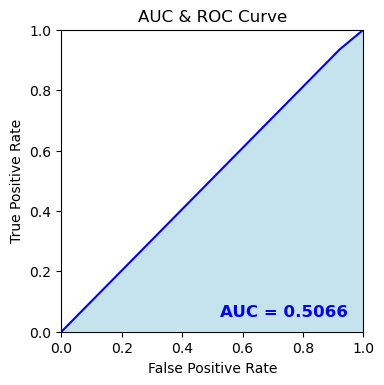

In [47]:
fp_rate, tp_rate, thresolds = metrics.roc_curve(single_len_test, single_len_pred)

plt.figure(figsize=(4, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fp_rate, tp_rate, 'b')
plt.fill_between(fp_rate, tp_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [48]:
test_start = 2015
test_end = 2022

base_rtns = []
svm_rtns = []

# get log returns by year
for i in range(0,len(range(test_start,test_end))):
    base = X['Return_1d'][y_test[i].index[0]:y_test[i].index[-1]+1]
    svm = X['Return_1d'][y_test[i].index[0]:y_test[i].index[-1]+1]*y_pred[i]
    base_rtns.append(base)
    svm_rtns.append(svm)

In [49]:
# get simple annual return the total return 
def get_returns(rtns_arr):
    ttl_rtn = 0
    annual_rtns = []
    for rtns in rtns_arr:
        annual_rtn = np.exp(sum(rtns))-1
        annual_rtns.append(annual_rtn)
        ttl_rtn += annual_rtn
    return annual_rtns, ttl_rtn

In [50]:
base_annu_rtn, base_ttl_rtn = get_returns(base_rtns)

In [51]:
svm_annu_rtn, svm_ttl_rtn = get_returns(svm_rtns)

In [52]:
# returns summary
rtn_tbl = pd.DataFrame.from_records([['{:.2%}'.format(base_annu_rtn[i]),'{:.2%}'.format(svm_annu_rtn[i])] for i in range(len(base_rtns))], 
                          columns=['Buy and Hold', 'ML Strategy'], 
                          index=[year for year in range(test_start,test_end)])

rtn_tbl.loc['mean'] = ['{:.2%}'.format(base_ttl_rtn/(test_end-test_start)),
                        '{:.2%}'.format(svm_ttl_rtn/(test_end-test_start))]
rtn_tbl.loc['total'] = ['{:.2%}'.format(base_ttl_rtn),'{:.2%}'.format(svm_ttl_rtn)]
rtn_tbl

,Buy and Hold,ML Strategy
2015,-2.21%,5.59%
2016,12.18%,17.99%
2017,19.40%,21.56%
2018,-6.89%,0.77%
2019,29.79%,24.06%
2020,13.59%,42.96%
2021,29.61%,26.53%
mean,13.64%,19.92%
total,95.47%,139.47%


### Sharpe Ratio
#### sharpe ratio = yearly return / yearly std

In [53]:
# Sharpe ratio
rf = 0.03

def get_sharpe(rtn_arr):
    sharpes = []
    stds = []
    for i in range(0,len(rtn_arr)):
        stds.append(np.std(rtn_arr[i])*np.sqrt(252))
        sharpes.append((sum(rtn_arr[i]) - rf) / stds[i])
    return stds,sharpes

In [54]:
base_vols, base_sharpes = get_sharpe(base_rtns)
svm_vols, svm_sharpes = get_sharpe(svm_rtns)

In [55]:
sharpe_tbl = pd.DataFrame.from_records([[base_sharpes[i],svm_sharpes[i]] for i in range(0,len(base_sharpes))], 
                          columns=['Buy and Hold', 'ML Strategy'], 
                          index=[year for year in range(test_start,test_end)])
sharpe_tbl.loc['mean']=[sharpe_tbl['Buy and Hold'].mean(),sharpe_tbl['ML Strategy'].mean()]
sharpe_tbl.loc['std']=[sharpe_tbl['Buy and Hold'].std(),sharpe_tbl['ML Strategy'].std()]

In [56]:
sharpe_tbl

,Buy and Hold,ML Strategy
2015,-0.336718,0.156995
2016,0.652694,1.042233
2017,2.207677,2.484545
2018,-0.594958,-0.130948
2019,1.848225,1.482285
2020,0.281264,0.946815
2021,1.765160,1.577810
mean,0.831906,1.079962
std,1.037412,0.821140
